In [1]:
import numpy as np   # Importo paquete de álgebra lineal
import matplotlib.pyplot as plt   # Importo paquete de gráficos
import copy
import mef
plt.rc('figure', figsize=(15,8))   # Para gráficos
plt.rc('font',size=22)             # Para gráficos

## Punto 3

Considere una barra con una carga axial aplicada de $T = -20 N/cm^2$, como se muestra en la figura. Determine el desplazamiento axial y la tensión. Tome $E = 210\: GPa$, $A = 10\: cm^2$ y $L = 1,50\: m$. Use primero uno y luego dos elementos. Intente generalizarlo a $n$ elementos y compare sus resultados con la solución teórica:

$$ \large
d(x)=\frac{|T|}{6 AE}(x^{3}-L^{3}) \hspace{0.5cm} ; \hspace{0.5cm} \sigma (x)= \frac{|T|}{2A}x^{2}
$$

<center><img src="ImgProb03.png"></center>

In [2]:
# Defino los grados de libertad por nodo "glxn".
glxn = 1   # Porque es una barra colgada, no debería moverse para ningún costado.

## Ejemplo de la Clase (para chequear que las funciones anden bien)

In [3]:
# Defino el módulo de elasticidad "E" de cada elemento.
E = 30*1e6   # N/cm^2

# Defino la sección "A" de cada elemento.
A = 2   # cm^2

# Defino la longitud "L" de la barra.
L = 60   # cm

# Defino valor de la carga axial "C" aplicada.
C = -10   # N/cm^2

### $1$ elemento

In [4]:
# Defino el número de elementos "Ne" y el número de nodos por elemento "Nnxe".
Ne = 1
Nnxe = 2

# Defino la longitud "Le" de cada elemento.
Le = L/Ne

# Defino el número de nodos "Nn".
Nn = 2

In [5]:
# Defino la matriz elemental "Ke0" del elemento "0"
Ke0 = (A*E/Le)*np.array([[1,-1],
                        [-1,1]])

In [6]:
# Obtengo la matriz global "K", ensamblando las matrices elementales. Como hay una sola, resulta:
K = Ke0

Debo resolver el sistema:
$$
\scriptsize \begin{pmatrix} F_0 \\ F_1 \end{pmatrix} \:\:\: = \:\:\: \left[K\right] \begin{pmatrix} x_0 \\ x_1 \end{pmatrix}
$$
, donde $F_i = f_i + R_i$, siendo $F_i$ la fuerza sobre el nodo $i$, $f_i$ una fuerza aplicada al nodo (debida a la carga distribuida) y $R_i$ la reacción del vínculo sobre el nodo (si la hubiera). 

La fuerza total $F_T$ actuante sobre el elemento se calcula como:
$$
F_T = \int_0^L T(x) dx = \int_0^L Cx dx = \frac{1}{2} C L^2
$$

In [7]:
# Calculo la fuerza total "FT".
FT = 0.5*C*(L**2)

In [8]:
# Distrubuyo la carga distribuida "T(x)" en los nodos "0" y "1".
# - Al nodo "0" le corresponde "f0 = FT/3".
f0 = FT/3
# - Al nodo "1" le corresponde "f1 = 2*FT/3".
f1 = 2*FT/3

Condiciones de vínculo en DESPLAZAMIENTO
- $x_1 = 0\: cm$ (empotramiento)

Condiciones de vínculo en FUERZA
- $F_0 = f_0$ (debida a la carga distribuida)

In [9]:
# Defino vector "s" que contiene los nodos con condiciones de vínculo en desplazamiento.
s = np.array([1])

# Defino vector "Us" con los valores de las condiciones de vínculo.
Us = [[0]]

# Defino vector "r" que contiene los nodos con condiciones de vínculo en fuerza. Es el complemento de "s".
r = np.array([i for i in range(Nn*glxn) if i not in s])

# Defino vector "Fr" con los valores de las condiciones de vínculo.
Fr = [[f0]]

In [10]:
# Llamo al paquete "mef", que contiene la función "solve" que calcula los vectores de fuerzas y torques "F", y de 
# desplazamientos y rotaciones "U", empleando MEF. 
F, U = mef.solve(K, r, Fr, s, Us)

In [11]:
for nodo in range(Ne+1):
    print('Nodo %s     U = %2.4f cm     F = %7.4f N'%(nodo, U[nodo], F[nodo]))

Nodo 0     U = -0.0060 cm     F = -6000.0000 N
Nodo 1     U = 0.0000 cm     F = 6000.0000 N


In [12]:
# Calculo la reacción "R_emp" del empotramiento sobre el último nodo "i = -1".
R_emp = F[-1] - f1
print('La REACCIÓN del empotramiento sobre el Nodo %s es R = %7.4f N'%(Ne, R_emp))

La REACCIÓN del empotramiento sobre el Nodo 1 es R = 18000.0000 N


### $2$ elementos

In [13]:
# Defino el número de elementos "Ne" y el número de nodos por elemento "Nnxe".
Ne = 2
Nnxe = 2

# Defino la longitud "Le" de cada elemento.
Le = L/Ne

# Defino el número de nodos "Nn".
Nn = 3

In [14]:
# Defino la matriz elemental "Ke" de los elementos "0" y "1".
Ke = (A*E/Le)*np.array([[1,-1],
                        [-1,1]])

In [15]:
# Obtengo la matriz global "K", ensamblando las matrices elementales.
Kg = np.zeros([glxn*Nn, glxn*Nn])

Kg[np.ix_([0,1],[0,1])] = Ke
Kg[np.ix_([1,2],[1,2])] += Ke

Debo resolver el sistema:
$$
\scriptsize \begin{pmatrix} F_0 \\ F_1 \\ F_2 \end{pmatrix} \:\:\: = \:\:\: \left[K\right] \begin{pmatrix} x_0 \\ x_1 \\ x_2 \end{pmatrix}
$$
, donde $F_i = f_i + R_i$, siendo $F_i$ la fuerza sobre el nodo $i$, $f_i$ una fuerza aplicada al nodo (debida a la carga distribuida) y $R_i$ la reacción del vínculo sobre el nodo (si la hubiera).

La fuerza total $F_{T}$ actuante sobre el elemento $0$ se calcula como:
$$
F_{T} = \int_0^{L_e} T(x) dx = \int_0^{L_e} Cx dx = \frac{1}{2} C {L_e}^2
$$

In [16]:
# Calculo la fuerza total "FT" actuante sobre el elemento "0".
FT = 0.5*C*(Le**2)

In [17]:
# Distrubuyo la carga distribuida "T(x)" en los nodos "0" y "1".
# - Al nodo "0" le corresponde "f0 = FT/3".
f0 = FT/3
# - Al nodo "1" le corresponde "f1 = 2*FT/3".
f1 = 2*FT/3

In [18]:
# Para no perder "f0" y "f1" que me van a ser de utilidad, creo vector de fuerzas "f" que en su elemento "i" guarde la
# fuerza asociada al nodo "i".
f = np.zeros([Ne+1])
f[0] = f0
f[1] = f1

La fuerza total actuante sobre el elemento $1$ es igual a la suma de:
- $F_{T}$, debida a carga no uniformemente distribuida (TRIÁNGULO).
- $2 F_{T}$, debida a carga uniformemente distribuida (RECTÁNGULO).

In [19]:
# Distrubuyo la carga distribuida "T(x)" en los nodos "1" y "2".
# - Al nodo "1" le corresponde "FT/3" (por el TRIÁNGULO) y "FT" (por el RECTÁNGULO), es decir, "4*FT/3".
f[1] += f0 + FT
# - Al nodo "2" le corresponde "2*FT/3" (por el TRIÁNGULO) y "FT" (por el RECTÁNGULO), es decir, "5*FT/3".
f[2] = f1 + FT

Condiciones de vínculo en DESPLAZAMIENTO
- $x_2 = 0\: cm$ (empotramiento)

Condiciones de vínculo en FUERZA
- $F_0 = f_0$ (debida a la carga distribuida)
- $F_1 = f_1$ (debida a la carga distribuida)

In [20]:
# Defino vector "s" que contiene los nodos con condiciones de vínculo en desplazamiento.
s = np.array([2])

# Defino vector "Us" con los valores de las condiciones de vínculo.
Us = [[0]]

# Defino vector "r" que contiene los nodos con condiciones de vínculo en fuerza. Es el complemento de "s".
r = np.array([i for i in range(Nn*glxn) if i not in s])

# Defino vector "Fr" con los valores de las condiciones de vínculo.
Fr = [[f[0]],[f[1]]]

In [21]:
# Llamo al paquete "mef", que contiene la función "solve" que calcula los vectores de fuerzas y torques "F", y de 
# desplazamientos y rotaciones "U", empleando MEF. 
F, U = mef.solve(Kg, r, Fr, s, Us)

In [22]:
for nodo in range(Ne+1):
    print('Nodo %s     U = %2.4f cm     F = %7.4f N'%(nodo, U[nodo], F[nodo]))

Nodo 0     U = -0.0060 cm     F = -1500.0000 N
Nodo 1     U = -0.0053 cm     F = -9000.0000 N
Nodo 2     U = 0.0000 cm     F = 10500.0000 N


In [23]:
# Calculo la reacción "R_emp" del empotramiento sobre el último nodo "i = -1".
R_emp = F[-1] - f[-1]
print('La REACCIÓN del empotramiento sobre el Nodo %s es R = %7.4f N'%(Ne, R_emp))

La REACCIÓN del empotramiento sobre el Nodo 2 es R = 18000.0000 N


### $n$ elementos

In [24]:
# Defino el número de elementos "Ne".
Ne = 1

In [25]:
# Llamo al paquete "mef", que contiene la función "subdiv", que particiona un elemento de longitud "L" en "Ne" elementos 
# de igual longitud.
F, U, R_emp, sigma, f, K = mef.subdiv(E, A, L, C, Ne, glxn)

In [26]:
for nodo in range(Ne+1):
    print('Nodo %s     U = %2.4f cm     F = %7.4f N'%(nodo, U[nodo], F[nodo]))

Nodo 0     U = -0.0060 cm     F = -6000.0000 N
Nodo 1     U = 0.0000 cm     F = 6000.0000 N


In [27]:
print('La REACCIÓN del empotramiento sobre el Nodo %s es R = %7.4f N'%(Ne, R_emp))

La REACCIÓN del empotramiento sobre el Nodo 1 es R = 18000.0000 N


## AHORA SÍ, resuelvo el Punto 3

In [28]:
# Defino el módulo de elasticidad "E" de cada elemento.
E = 210*1e9   # Pa = N/m^2

# Defino la sección "A" de cada elemento.
A = 10*1e-4   # m^2

# Defino la longitud "L" de la barra.
L = 1.5   # m

# Defino valor de la carga axial "C" aplicada.
C = -20*(100**2)   # N/m^2

In [29]:
# Defino DESPLAZAMIENTOS teóricos.
def d_x(x):
    d = (abs(C)/(6*A*E))*(x**3 - L**3)
    return d

# Defino TENSIONES teóricas.
def sig_x(x):
    sig = (abs(C)/(2*A))*x**2
    return sig


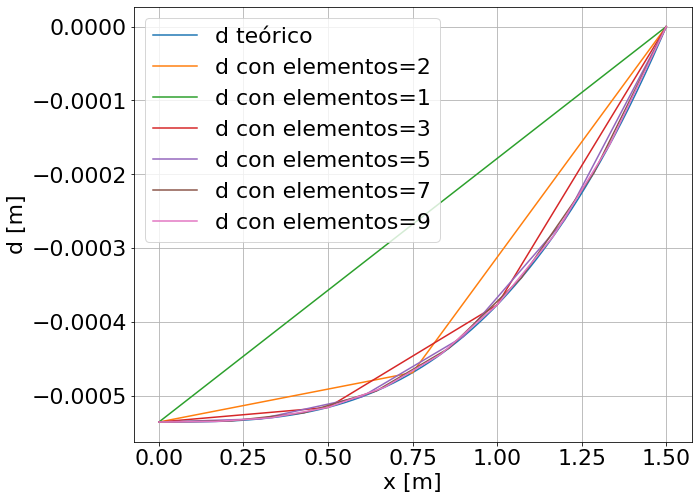

In [30]:
# Gráfico.
fig, ax = plt.subplots(figsize=(10,8))
x_teo = np.linspace(0,L,500)
plt.plot(x_teo,d_x(x_teo),label='d teórico')

Nee = 2
F, U, R_emp, sigma, f, K = mef.subdiv(E, A, L, C, Nee, glxn)
x_exp = np.linspace(0,L,Nee+1)
plt.plot(x_exp,U,label=f'd con elementos={Nee}')

for Ne in range(1,11,2):
    F, U, R_emp, sigma, f, K = mef.subdiv(E, A, L, C, Ne, glxn)
    x_exp = np.linspace(0,L,Ne+1)
    plt.plot(x_exp,U,label=f'd con elementos={Ne}')
plt.ylabel('d [m]')
plt.xlabel('x [m]')
plt.legend()
plt.grid('on')

### $n$ elementos

In [31]:
# Defino el número de elementos "Ne".
Ne = 100

In [32]:
# Llamo al paquete "mef", que contiene la función "subdiv", que particiona un elemento de longitud "L" en "Ne" elementos 
# de igual longitud.
F, U, R_emp, sigma, f, K = mef.subdiv(E, A, L, C, Ne, glxn)

In [33]:
for nodo in range(Ne+1):
    print('Nodo %s     U = %2.5f m     F = %7.1f N'%(nodo, U[nodo], F[nodo]))

Nodo 0     U = -0.00054 m     F =    -7.5 N
Nodo 1     U = -0.00054 m     F =   -45.0 N
Nodo 2     U = -0.00054 m     F =   -90.0 N
Nodo 3     U = -0.00054 m     F =  -135.0 N
Nodo 4     U = -0.00054 m     F =  -180.0 N
Nodo 5     U = -0.00054 m     F =  -225.0 N
Nodo 6     U = -0.00054 m     F =  -270.0 N
Nodo 7     U = -0.00054 m     F =  -315.0 N
Nodo 8     U = -0.00054 m     F =  -360.0 N
Nodo 9     U = -0.00054 m     F =  -405.0 N
Nodo 10     U = -0.00054 m     F =  -450.0 N
Nodo 11     U = -0.00054 m     F =  -495.0 N
Nodo 12     U = -0.00053 m     F =  -540.0 N
Nodo 13     U = -0.00053 m     F =  -585.0 N
Nodo 14     U = -0.00053 m     F =  -630.0 N
Nodo 15     U = -0.00053 m     F =  -675.0 N
Nodo 16     U = -0.00053 m     F =  -720.0 N
Nodo 17     U = -0.00053 m     F =  -765.0 N
Nodo 18     U = -0.00053 m     F =  -810.0 N
Nodo 19     U = -0.00053 m     F =  -855.0 N
Nodo 20     U = -0.00053 m     F =  -900.0 N
Nodo 21     U = -0.00053 m     F =  -945.0 N
Nodo 22     U = -0.0

In [34]:
print('La REACCIÓN del empotramiento sobre el Nodo %s es R = %7.4f N'%(Ne, R_emp))

La REACCIÓN del empotramiento sobre el Nodo 100 es R = 225000.0000 N


In [35]:
for nodo in range(Ne):
    print('Elemento %s     Tensión = %2.5f MN/m^2'%(nodo, sigma[nodo]))

Elemento 0     Tensión = 7500.00000 MN/m^2
Elemento 1     Tensión = 52500.00000 MN/m^2
Elemento 2     Tensión = 142500.00000 MN/m^2
Elemento 3     Tensión = 277500.00000 MN/m^2
Elemento 4     Tensión = 457500.00000 MN/m^2
Elemento 5     Tensión = 682500.00000 MN/m^2
Elemento 6     Tensión = 952500.00000 MN/m^2
Elemento 7     Tensión = 1267500.00000 MN/m^2
Elemento 8     Tensión = 1627500.00000 MN/m^2
Elemento 9     Tensión = 2032500.00000 MN/m^2
Elemento 10     Tensión = 2482500.00000 MN/m^2
Elemento 11     Tensión = 2977500.00000 MN/m^2
Elemento 12     Tensión = 3517500.00000 MN/m^2
Elemento 13     Tensión = 4102500.00000 MN/m^2
Elemento 14     Tensión = 4732500.00000 MN/m^2
Elemento 15     Tensión = 5407500.00000 MN/m^2
Elemento 16     Tensión = 6127500.00000 MN/m^2
Elemento 17     Tensión = 6892500.00000 MN/m^2
Elemento 18     Tensión = 7702500.00000 MN/m^2
Elemento 19     Tensión = 8557500.00000 MN/m^2
Elemento 20     Tensión = 9457500.00000 MN/m^2
Elemento 21     Tensión = 1040250

In [36]:
# Defino la matriz de nodos "MN", aprovechando que son todos colineales en el eje "x" y todas las barras miden lo mismo.
MN = np.zeros([Ne+1]).reshape([-1,1])
sum = 0
for i in range(Ne+1):
    MN[i] = sum
    sum += L/Ne

In [37]:
# Defino vector "sig_elem":
# - Columna "0" almacena nodos, para poder representar los elementos.
# - Columna "1" almacena tensiones, constantes en cada elemento.
sig_elem = np.zeros([2*Ne, 2])
for i in range(Ne):
    sig_elem[i*2,0] = MN[i]
    sig_elem[i*2 + 1,0] = MN[i+1]
    sig_elem[i*2,1] = sigma[i]
    sig_elem[i*2 + 1,1] = sigma[i]

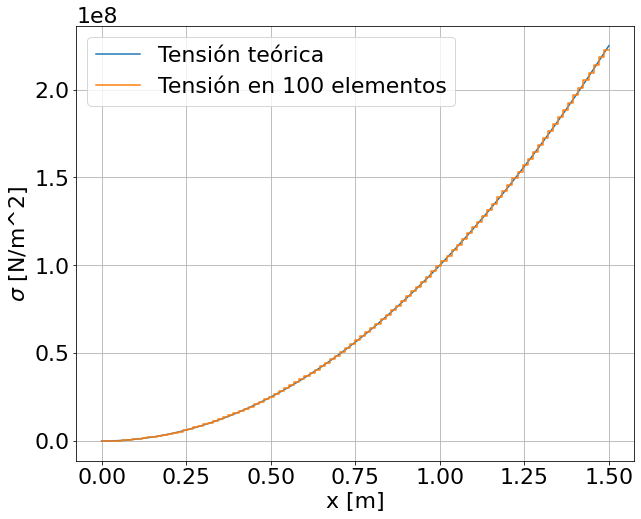

In [38]:
# Gráfico de las tensiones, según cantidad de elementos.
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(x_teo,sig_x(x_teo),label='Tensión teórica')
plt.plot(sig_elem[:,0],sig_elem[:,1],label=f'Tensión en {Ne} elementos')

plt.ylabel('$\sigma$ [N/m^2]')
plt.xlabel('x [m]')
plt.legend()
plt.grid('on')

In [39]:
# Las tensiones dan constantes en cada barra, por culpa de derivar las funciones de interpolación.
# Puedo decir que para el centro de cada elemento, va a dar la tensión teórica a medida que más elementos uso.